<a href="https://colab.research.google.com/github/UtkarshRasal/deep_learning/blob/master/neural_networks_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification

* Classification means predicting that the input belongs to which category.
* Classification can be of multiple types:-
  * Binary Classification - The output will be only one (one of the two items)
  * Multi level classification - The will be one of more than two items (like if there are 3 classes, then the output will be 3, having indivisual probabilites and one of three having highest probability will be chosen as correct output
  * Multilabel - Target can be assigned more than one option
* In this colab, we will create a dataset of red and blue dots using sklean make_circles() and will create a model to decide the input belongs to which category.


## Topics to be covered

1. Architecture of neural network.
2. Getting binary Classification data ready
3. Building a PyTorch Model
4. Fitting the model to data (Training)
5. Make predictions and evaluating a model
6. Improving the model
7. Non-linearity
8. Replicating non linear functions
9. Putting it all together with multi-class classification

### 1) Architecture of neural networks

* Input layer shape - Number of input neurons is same as the number of input features we have (like in our case 2 as we have two inputs - red and blue dots)
* Hidden layer - Depends on the type of work we are doing - Min 1 and max unlimited
* Hidden layers - number of neurons the hidden layer has (10 to 512)
* Output Layer Shape -
  * Binary classification - The output neurons is only 1 as the output will be either of the two (red or blue dots in our case)
  * Multi-class Classification - The output neurons will be equal to our classes (For example:- classifying image into dog, cat or cow then the output neurons will be 3)
* Hidden Layer Activation - Is used to introduce non-linearity. Mostly used ReLU(Rectified Linear Unit)
* Output Activation function -
  * Binary Classification - Activation function used will be Sigmoid which outputs a probability between 0 and 1. For eg:- in our case if red is 1 and blue is 0, so sigmoid will assign a probality of 0.7 to the output which is closer to 1 so we consider the predicted output to be red
  * Multi-class Classification - Activation function used will be SoftMax. As in multi-class classification the output neurons are equal to the classes, Softmax will assign different probabilites to the output classes and the sum of these probabilites will be 1
* Loss Function - Binary Cross Entropy (Binary) or Cross Entropy (Multi-class)
* Optimizer - SGD (stoichastic Gradient Descent) or Adam

In [1]:
# All imports
import torch, pandas as pd
from torch import nn
from matplotlib import pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

### 2) Get Binary Classification Data Ready

In [2]:
# sklearn make_circles() -

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03, # little bit of noise to the dots
                    random_state=42 # to get the same output every time the function is called
                    )

# output shape of X -> (n_samples, 2)
# output shape of y -> (n_samples)

X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [3]:
# Make DataFrame of circle data to visualize
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


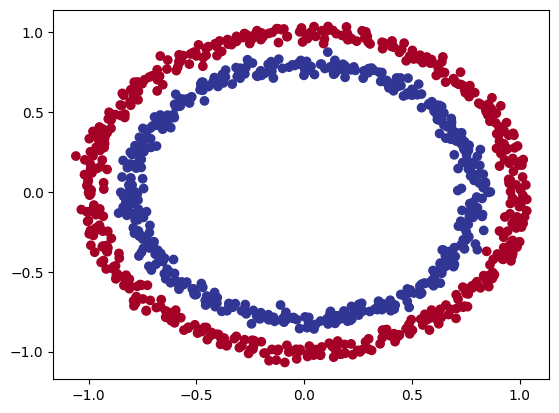

In [4]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [5]:
# turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [6]:
X[:10], y[:10]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967],
         [-0.4796,  0.6764],
         [-0.0136,  0.8033],
         [ 0.7715,  0.1478],
         [-0.1693, -0.7935],
         [-0.1215,  1.0215]]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

In [7]:
# turn data into train_test_split
# we will be using inbuilt function from sklearn to split the data for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, # 0.2 means 20% for testing and 80% for  training
                                                    random_state=42 # to return the same data every time the function is called
                                                    )

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

### 3) Model Building

* We want a model capable of handling our X data as inputs and producing something in the shape of our y data as outputs.
* This setup where you have features and labels is referred to as supervised learning. Because your data is telling your model what the outputs should be given a certain input

In [8]:
# setup GPU or CPU based on device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [9]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        # Also called the hidden layers of neural networks
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)

    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

#### Info about layers of above model

* nn.Linear we will create a hidden layer and will take in_features and out_features as parameters
* First layer takes in 2 features (2 because of red and blue dots) and produces 5 outputs features. This helps the model to learn from 5 features instead of 2 features
* The only rule with hidden units is that the next layer, in our case, self.layer_2 has to take the same in_features as the previous layer out_features.
* That's why self.layer_2 has in_features=5, it takes the out_features=5 from self.layer_1 and performs a linear computation on them, turning them into out_features=1 (the same shape as y).

In [10]:
# Setup loss function and optimizer
# As we are working on binary classification problem and not regression problem(like predicting straight line) we will be using Binary cross entropy loss function
# for optimizer - SGD (Stoichastic Gradient Descent)

loss_fn = torch.nn.BCEWithLogitsLoss() # BCEWithItsLogitsLoss() finction has a sigmoid (definition can be found above) layer built-in

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

* Now lets create an evaluation metrix. Like a loss function measures how wrong the model is, similarly an evaluation metrix tells how right our model is.
* Both of these function does the same job, but an evaluation metrix gives us a new perspective.
* There are lot of evaluation metrix available but for this binary classification problem, we will be using the accuracy function
* Accuracy can be measured by dividing the total number of correct predictions over the total number of predictions
* For example:- a model that makes 99 correct predictions out of 100, has 99% accuracy

In [11]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  accuracy = (correct / len(y_pred)) * 100
  return accuracy

### 4) Train Model

*Forward pass - The model goes through all of the training data once, performing its forward() function calculations (model(x_train)).
* Calculate the loss - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are (loss = loss_fn(y_pred, y_train).
* Zero gradients - The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step (optimizer.zero_grad()).
* Perform backpropagation on the loss - Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards" (loss.backward()).
* Step the optimizer (gradient descent) - Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them (optimizer.step()).

In [12]:
# lets fetch the predicted with raw mode or untrained model
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.0999],
        [0.1453],
        [0.0382],
        [0.1172],
        [0.1289]], device='cuda:0', grad_fn=<SliceBackward0>)

In [13]:
# since our mode is trained, these are just random
# these are the outputs of our forward function, which implements two layers of nn.Linear() which internally calls y = mx+b
# The raw outputs of our raw model are called logits
# but these numbers are hard to interpret, so we want some numbers which are comparable to our original numbers
# for this we can use a sigmoid activation function
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5250],
        [0.5363],
        [0.5096],
        [0.5293],
        [0.5322]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [14]:
# it seems like the outputs now have some kind of consistency(even though they are still random)
# they are now in the form of prediction probabilities
# In our case, since we're dealing with binary classification, our ideal outputs are 0 or 1.
# So these values can be viewed as a decision boundary.
# The closer to 0, the more the model thinks the sample belongs to class 0, the closer to 1, the more the model thinks the sample belongs to class 1.

# To turn our prediction probabilities into prediction labels, we can round the outputs of the sigmoid activation function

# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [15]:
# now our model predictions are of the same form as our original labels
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [16]:
# Use of the sigmoid function is not required when using nn.BCEWithLogitsLoss() function because it has built-in sigmoid function


#### 4.1) Building train test loop

In [17]:
torch.manual_seed(42)

epochs = 100

# put data to target device
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

for epoch in range(epochs):
  # TRAINING
  model_0.train()

  # forward pass
  y_logits = model_0(X_train).squeeze() # to remove extra 1 dimension
  y_pred = torch.round(torch.sigmoid(y_logits)) # passing logits to the sigmoid function

  # loss function
  loss = loss_fn(y_logits, y_train)

  # calculate accuracy
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  # TESTING
  model_0.eval()
  with torch.inference_mode():
    # forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)

    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  # Print out what's happening every 10 epochs
  if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")




Epoch: 0 | Loss: 0.69487, Accuracy: 50.00% | Test loss: 0.69676, Test acc: 50.00%
Epoch: 10 | Loss: 0.69365, Accuracy: 55.50% | Test loss: 0.69543, Test acc: 49.50%
Epoch: 20 | Loss: 0.69327, Accuracy: 52.38% | Test loss: 0.69497, Test acc: 49.50%
Epoch: 30 | Loss: 0.69315, Accuracy: 52.25% | Test loss: 0.69479, Test acc: 47.00%
Epoch: 40 | Loss: 0.69310, Accuracy: 51.25% | Test loss: 0.69471, Test acc: 48.00%
Epoch: 50 | Loss: 0.69307, Accuracy: 50.75% | Test loss: 0.69466, Test acc: 47.50%
Epoch: 60 | Loss: 0.69305, Accuracy: 50.25% | Test loss: 0.69463, Test acc: 47.50%
Epoch: 70 | Loss: 0.69304, Accuracy: 50.50% | Test loss: 0.69462, Test acc: 47.50%
Epoch: 80 | Loss: 0.69303, Accuracy: 50.62% | Test loss: 0.69461, Test acc: 47.50%
Epoch: 90 | Loss: 0.69302, Accuracy: 50.50% | Test loss: 0.69460, Test acc: 48.00%


### 5) Make predictions and evaluate the mode

* From the above train test loop we can say that our model is random guessing. The accuracy will mostly be 50% as we have only two options to guess 1 or 0
* lets visualize and analyse

In [18]:
# To do so, we'll write some code to download and import the helper_functions.py script from the Learn PyTorch for Deep Learning repo.

# It contains a helpful function called plot_decision_boundary() which creates a NumPy meshgrid to visually plot the different points where our model is predicting certain classes

In [19]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

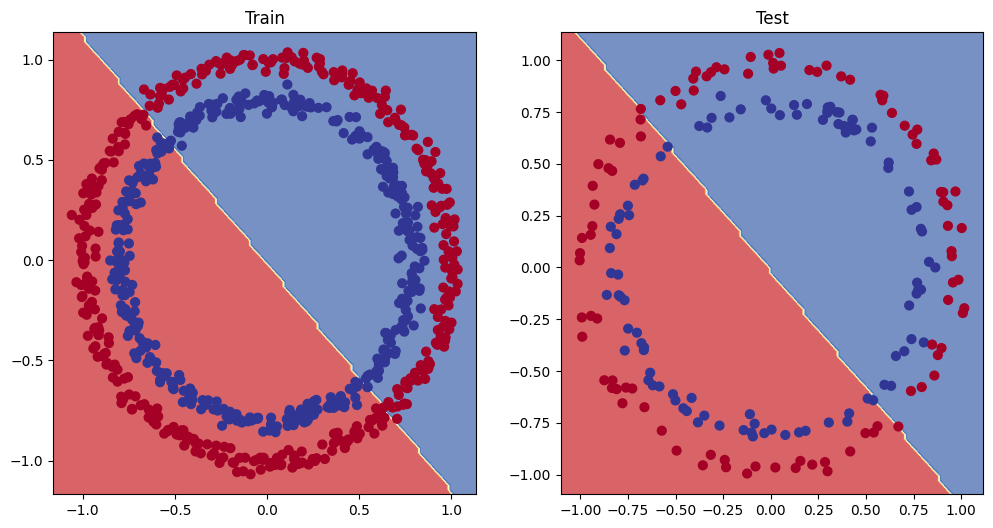

In [20]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [21]:
# it seems like we've found the cause of model's performance issue.

# It's currently trying to split the red and blue dots using a straight line...

# That explains the 50% accuracy. Since our data is circular, drawing a straight line can at best cut it down the middle.

# In machine learning terms, our model is underfitting, meaning it's not learning predictive patterns from the data.

### 6) Improving the model

* Add more layers - Each layer potentially increases the learning capabilites of the model. More layers often means making the neural network deeper
* Add more hidden units - Similary, increasing more hidden units increases the learning capabilites of the model. More hidden units often means making the neural network wider.
* Fitting for longer - Increasing epochs - Your model might learn if it had more opportunities to look at the data.
* Changing the activation functions - Some data just can't be fit with only straight lines. Using non linear activation functions can help with this. (ReLU)
* Change the learning rate - learning rate tells how much a model should change its paramaters in each step. Too much change will lead to over correcting the model and too litte will lead to not learning enough
* Change the loss function
* Use transfer learning - Take a pretrained model related to your problem and adjust it to your own problem.

In [22]:
# lets see what happens if we add an extra layer and change the epoch size to 1000

class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, X):
    return self.layer_3(self.layer_2(self.layer_1(X)))

    # another way to write the above mentioned statement
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    # return z


model_1 = CircleModelV1().to(device)
model_1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [23]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

#### Training loop for 1000 epochs

In [24]:
torch.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  ### TRAINING
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate loss accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_preds)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backwards
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### TESTING
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    # 2.calculate loss and accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 46.50%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 46.50%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69437, Test acc: 46.50%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69458, Test acc: 46.50%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.50%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69467, Test acc: 46.50%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.50%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.50%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.50%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.50%


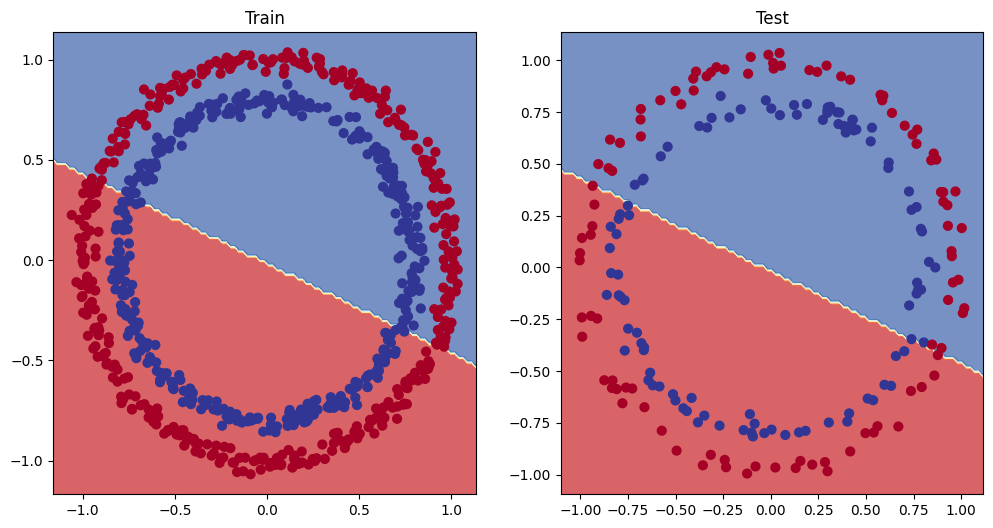

In [25]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 7) Improving the model with non-linearity

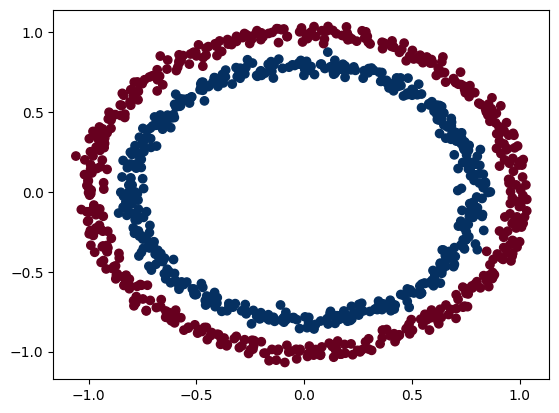

In [26]:
#  lets create the data to start fresh
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [27]:
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

#### 7.1) Building a model with non-linearity

* So far our neural networkshave only been using straight or linear lines function. But our data is non-linear (circles).
* We'll create a non-linear activation function called as ReLU (Rectified Linear Unit)


In [47]:
# Build a model with non-linear activation function

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__();

    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=10)
    self.layer_4 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # --> ReLU activation function

  def forward(self, X):
    return self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(X)))))))

model_2 = CircleModelV2().to(device)
model_2

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=10, bias=True)
  (layer_4): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [48]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

#### 7.2) Training the model with non-linearity

In [51]:
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_2.train()
  y_logits = model_2(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_logits = model_2(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.04011, Accuracy: 100.00% | Test Loss: 0.07858, Test Accuracy: 98.00%
Epoch: 100 | Loss: 0.02663, Accuracy: 99.88% | Test Loss: 0.06015, Test Accuracy: 97.50%
Epoch: 200 | Loss: 0.02011, Accuracy: 99.88% | Test Loss: 0.05179, Test Accuracy: 98.00%
Epoch: 300 | Loss: 0.01612, Accuracy: 100.00% | Test Loss: 0.04678, Test Accuracy: 98.00%
Epoch: 400 | Loss: 0.01342, Accuracy: 100.00% | Test Loss: 0.04354, Test Accuracy: 98.00%
Epoch: 500 | Loss: 0.01147, Accuracy: 100.00% | Test Loss: 0.04132, Test Accuracy: 98.00%
Epoch: 600 | Loss: 0.01000, Accuracy: 100.00% | Test Loss: 0.03969, Test Accuracy: 98.00%
Epoch: 700 | Loss: 0.00885, Accuracy: 100.00% | Test Loss: 0.03845, Test Accuracy: 98.00%
Epoch: 800 | Loss: 0.00792, Accuracy: 100.00% | Test Loss: 0.03747, Test Accuracy: 98.00%
Epoch: 900 | Loss: 0.00715, Accuracy: 100.00% | Test Loss: 0.03667, Test Accuracy: 98.00%


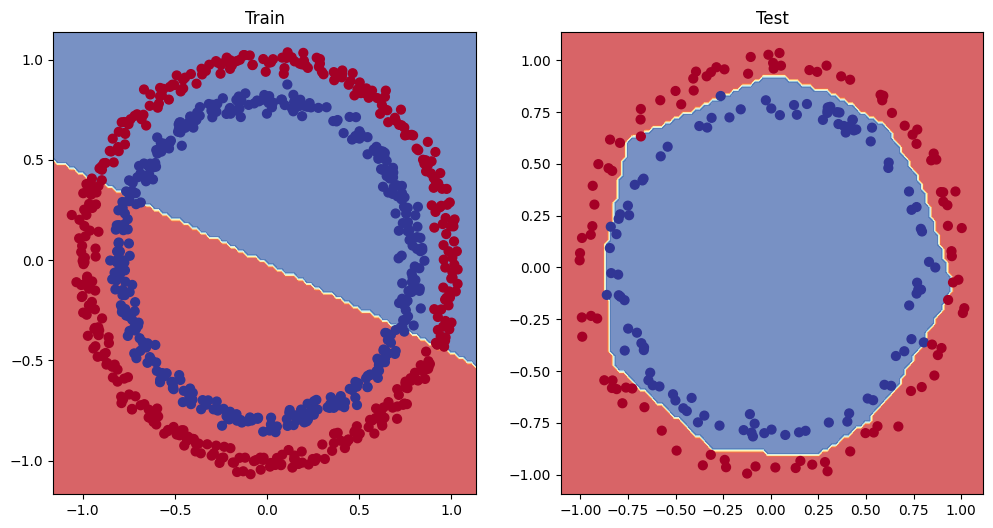

In [52]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test) # model_3 = has non-linearity